In [14]:
from utils import * 
from algorithms import *
from agents import *

In [15]:
numRounds, numPeriods, numSteps = 1, 10000, 10
numBuyers, numSellers, numTokens = 2, 4, 4
gameTypes, seed = '1001', 42
disclosure = []
depth = 0
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
verbose = 1
numStates = 2
buyers = [Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, numStates = 2, algo='SAC1'),
          Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, numStates = 2, algo='SAC1')]
          #ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]
sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure)
rnd = 0

In [ ]:
print_interval = 10
for rnd in range(numRounds):
    startRounds(gameData, log, buyers, sellers, rnd)
    score1, score2 = 0.0, 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):
            # start
            startSteps(buyers, sellers)

            # set state
            buyers[0].state = [buyers[0].periodSteps, buyers[0].periodTrades]
            buyers[1].state = [buyers[1].periodSteps, buyers[1].periodTrades]

            # trade
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            if currentBidIdx == 0:
                score1 += bprofit
            if currentBidIdx == 1:
                score2 += bprofit
                
            # log and end step
            log.addStep([rnd, period, step, bids, asks, currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0, bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers) # updates period counters

            # new state and done
            buyers[0].newState = [step+1, buyers[0].periodTrades]
            buyers[1].newState = [step+1, buyers[1].periodTrades]
            if step == numSteps - 1:
                buyers[0].done = True
                buyers[1].done = True
            else:
                buyers[0].done = False
                buyers[1].done = False

            # load data and train
            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)

        endPeriods(buyers, sellers)
        if period%print_interval==0:
            print(score1/print_interval, score2/print_interval)
            score1, score2 = 0.0, 0.0
    endRounds(buyers, sellers)

10.454525682690623 12.630357673641328
117.56091607651624 104.55414185191702
115.20494049944918 104.34665683659156
108.78501375489411 105.73724822734762
104.82559967149243 108.21773623665722
106.26809641214386 106.35595496964056
113.26889742833237 111.78716270008461
112.19976629365674 109.13997068925485
116.94052999430801 104.51032800172177
112.6799264319321 104.87557575706663
110.97106364163525 107.19066769820316
120.26226657499251 110.54056892953324
109.42472233423248 105.9701027852395
115.49002403519148 107.56370754325216
109.0209984990327 107.70269987630147
114.95683032983553 116.54875172993152
108.27103121134397 106.81194836400907
117.20512289058115 102.93687990733247
107.99140312960552 110.87143194245058
109.93972429880964 113.49108012778898
115.49183132105267 110.06521987221386
92.02047047440672 110.27348880149955


In [ ]:
log.graphLearning(rolling_window = 100, trackBuyersIdx=[0,1], trackSellersIdx=[])

In [ ]:
log.graphSales(0, period-1, trackBuyersIdx=[0,1], trackSellersIdx=[])

In [ ]:
log.roundData.buyerValues.item()

In [ ]:
log.stepData.tail(15)

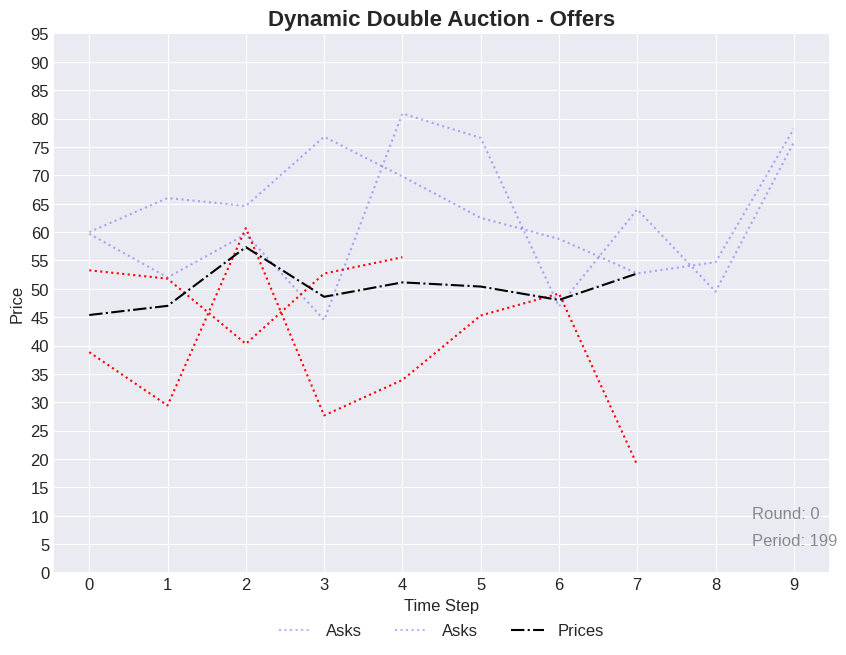

In [10]:
log.graphOffers(0, period-1, trackBuyersIdx=[0,1], trackSellersIdx=[])

In [6]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/50), trackBuyersIdx = [0,1])